## Introduction {-} 

For this project, I chose to use data from the FBI's National Instant Criminal Background Check System (NICS), which is used by gun shops to check the eligibility of a prospective buyer, as well as state-level demographic data from the U.S. Census Bureau. 

I will use both datasets in order to investigate historical trends and socio-economic characteristics associated with gun registrations, with a particular focus on my homestate of Illinois and its neighbor Indiana. Over the past few years, the city of Chicago has seen a rapid increase in the volume of gun-related violence - particularly in 2015 and 2016, which experienced the most murders since 1997 (\href{https://edition.cnn.com/2017/01/01/us/chicago-murders-2016/index.html}{source}). Many of the guns use in these crimes originate outside of Illinois, from neighboring states like Indiana, who have less stringent gun laws (\href{https://fivethirtyeight.com/features/gun-laws-stop-at-state-lines-but-guns-dont/}{source}). Ideally, I would use the NICS dataset in conjungtion with another dataset that could provide more information about the relationship between gun registrations and legilsation, e.g. what percentage of attempted gun registrations are rejected by state. 

In orer to further explore gun registrations within both states, I will answer the following questions: 

1. What is the nationwide trend of gun registrations?

2. Do Illinois and Indiana see higher or lower registrations compared to the national average? 
    
3. What socio-economic characteristics are associated with higher gun registrations?  

In [1]:
# import packages 
import numpy as np
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.display import Latex
import warnings
%matplotlib inline

In [2]:
# suppress warnings 
warnings.simplefilter('ignore')

In [3]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

## Data Wrangling {-} 

To better understand each dataset, I will first view the first few lines of code using .head(). I can then learn more about the dataset's size and datatypes using .shape and .dtypes. To determine what I will need to clean, I can use sum(df.duplicated()) to check if any duplicate rows exist and pd.isnull(df).sum() to see how many missing values are present. 

In [4]:
# load datasets 
nics = pd.read_excel(r'C:\Users\t_gas\Desktop\Data Portfolio\Udacity\Investigate a Dataset\gun_data.xlsx')
census = pd.read_csv(r'C:\Users\t_gas\Desktop\Data Portfolio\Udacity\Investigate a Dataset\U.S. Census Data.csv')

In [5]:
# view dataset
display(nics.head())

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [6]:
# view dataset size 
nics.shape

(12485, 27)

In [7]:
# check datatypes
nics.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [8]:
# check for duplicates 
sum(nics.duplicated())

0

In [9]:
# check for null values 
pd.isnull(nics).sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [10]:
# view dataset 
display(census.head())

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [11]:
# view dataset size
census.shape

(85, 52)

In [12]:
# check datatypes
census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [13]:
# check for duplicates 
sum(census.duplicated())

3

In [14]:
# check for null values 
pd.isnull(census).sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

### General Properties {-} 

+ **NICS**

This dataset consists of 27 columns and 12485 instances. The first column provides the month of the data collected, the second column shows the state, the next 24 columns give more information about different transactions (categorized by firearm type), and the final column displays the total number of gun registrations. 

Luckily, it appears that all the data except the "Month" column is saved correctly as either a string, int or float depending on its category. Similarly, no duplicates exist. However, 23 of the 27 columns contain missing data - anywhere from only 19 to over 11,000 rows. I will have to explore the dataset's documentation to get a better understanding of the column headers, which will help me decide how to handle these missing values.


+ **Census**

This dataset is smaller than the NICS dataset, containing 52 columns and 85 instances. The first column provides demographic information (per row), the second column gives extra details about the first column, and the next 50 columns list the 50 U.S. states. 

Unlike the previous dataset, all of these columns are saved as objects and the majority will need to be converted to int or float. Additionally, 3 duplicate rows exist and every column has null values - the majority missing 20 pieces of data. Thanks to the rather detailed "Fact" column, this dataset is easier to understand without additional documentation. However, this "Fact" column will have to be separated into different columns, as it does not follow the properties of tidy data and contains too many different types of information - such as how the data was measured and when it was recorded. 

### Data Cleaning {-} 

I will first need to address the missing data present in both datasets, beginning with the NICS dataset. To decide the most appropriate way to fix the issue, I will first take a deeper look at the corresponding documentation to learn more about the dataset. 

According to the FBI, each column represents a type of firearm as well as transaction. In addition to what I term the 'regular' transaction, where a buyer purchases a firearm from a seller, there are six other types of transactions, defined as follows: 

+ pre-pawn: pledging or pawning a firearm as a security for the payment or repayment of money 
+ redemption: attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop
+ returned/disposition: returning a firearm to its owner
+ rentals: attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business
+ private sale: attempting to possess a firearm from a private party seller who is not an officially-licensed Federal Firearms Licensee
+ return to seller - private sale: attempting to possess a firearm from a private party seller who is not an officially-licensed Federal Firearms Licensee

(\href{https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view}{source}). 

The FBI also notes that due to the disparate nature of state firearm regulations, the number of firearm background checks cannot be used as a proxy for total number of firearm sales. 

Based on this documentation and given the high percentage of missing data, I have decided to only focus on the "Totals" column, which provides the total number of background checks conducted for all different types of firearms and transactions. 

In [15]:
# remove columns
nics = nics[['month', 'state', 'totals']]

I will now check and see if any of the remaining rows are missing any values. 

In [16]:
# check for null values 
pd.isnull(nics).sum()

month     0
state     0
totals    0
dtype: int64

Great - I have no missing values! To finish cleaning the NICS dataset, I will change the datatype of the "Month" column from a string to datetime and remove any possible whitespaces from the "State" column.

In [17]:
# change column datatype
nics['month']=pd.to_datetime(nics['month'])

# remove whitespaces
nics.columns = nics.columns.str.strip()

Finally, I will also look at the values in the "state" column and remove any territories if necessary, as I would like my analysis to concentrate only on U.S. states.

In [18]:
# view column values
nics['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [19]:
# create list of territories to drop 
nics_drop = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']

#nics['state'] = nics['state'].drop(nics_drop, inplace = True, axis = 0)
nics = nics[~nics['state'].isin(nics_drop)]

Now turning to the census dataset, I want to first more closely examine the "Fact" column and decide which values will be relevant to my analysis.  

In [20]:
census['Fact'].unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

I plan to focus on socio-economic characteristics, so I will keep all columns concerning age, education level, household income and unemployment. 

In [21]:
# select data to keep
census_keep = ['Population estimates, July 1, 2016,  (V2016)',
               'Population estimates base, April 1, 2010,  (V2016)',
               'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
               'Population, Census, April 1, 2010',
               'Persons under 5 years, percent, July 1, 2016,  (V2016)',
               'Persons under 5 years, percent, April 1, 2010',
               'Persons under 18 years, percent, July 1, 2016,  (V2016)',
               'Persons under 18 years, percent, April 1, 2010',
               'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
               'Persons 65 years and over, percent, April 1, 2010',
               'Female persons, percent,  July 1, 2016,  (V2016)',
               'Female persons, percent, April 1, 2010',
               'Median value of owner-occupied housing units, 2011-2015', 
               'Median gross rent, 2011-2015',
               'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
               "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", 
               'Median household income (in 2015 dollars), 2011-2015',
               'Per capita income in past 12 months (in 2015 dollars), 2011-2015', 
               'Persons in poverty, percent']

# filer dataframe
census = census.loc[census['Fact'].isin(census_keep)]

Because I eliminated certain rows from my dataset, I want to once again check the amount of missing values. 

In [22]:
pd.isnull(census).sum()

Fact               0
Fact Note         19
Alabama            0
Alaska             0
Arizona            0
Arkansas           0
California         0
Colorado           0
Connecticut        0
Delaware           0
Florida            0
Georgia            0
Hawaii             0
Idaho              0
Illinois           0
Indiana            0
Iowa               0
Kansas             0
Kentucky           0
Louisiana          0
Maine              0
Maryland           0
Massachusetts      0
Michigan           0
Minnesota          0
Mississippi        0
Missouri           0
Montana            0
Nebraska           0
Nevada             0
New Hampshire      0
New Jersey         0
New Mexico         0
New York           0
North Carolina     0
North Dakota       0
Ohio               0
Oklahoma           0
Oregon             0
Pennsylvania       0
Rhode Island       0
South Carolina     0
South Dakota       0
Tennessee          0
Texas              0
Utah               0
Vermont            0
Virginia     

Luckily, it seems that by selecting fewer rows of data, almost all of my missing data is gone. Given that every row in the "Fact Note" column is now missing, I will simply remove that column. 

In [23]:
census.drop(columns='Fact Note', inplace=True)

I would like to further explore the rows where a year range rather than a specific date is listed, to see if this will need to be divided into two separate columns. 

In [24]:
census.loc[census['Fact'] == 'Median value of owner-occupied housing units, 2011-2015']

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
25,"Median value of owner-occupied housing units, ...","$125,500","$250,000","$167,500","$111,400","$385,500","$247,800","$270,500","$231,500","$159,000",...,140500,142100,"$136,000","$215,900","$217,500","$245,000","$259,500","$103,800","$165,800","$194,800"


It looks like only a median value across years rather than a value per year is provided. Although this is simpler from a data cleaning perspective, it also implies that this data will not be able to provide me with as much historical data as I originally thought. 

Now I will separate the "Fact" column into four columns - Fact, Notes, Date, and Year. To do this, I will first remove the value (V2016) and then manually rename most of the existing values in the column. Although such types of manual changes are not ideal for creating pipelines or working with larger amounts of data, it is the most reasonable option in this particular case. 

In [25]:
# remove (value) from "Date" column 
census['Fact'] = census['Fact'].str.replace(r"\,  \(.*\)","")

In [26]:
# rename select columns 
census.replace({'Fact' : {'Population estimates, July 1, 2016':
                          'Population estimates, number, July 1, 2016',
                          'Population estimates base, April 1, 2010':
                          'Population estimates base, number, April 1, 2010',
                          'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016': 
                          'Population, percent change, no date, 2010-2016', 
                          'Median value of owner-occupied housing units, 2011-2015':
                          'Median value of owner-occupied housing units, median, no date, 2011-2015',
                          'Median gross rent, 2011-2015':
                          'Median gross rent, median, no date, 2011-2015',
                          'High school graduate or higher, percent of persons age 25 years+, 2011-2015':
                          'High school graduate or higher, percent of persons age 25 years+, no date, 2011-2015',
                          "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015":
                          "Bachelor's degree or higher, percent of persons age 25 years+, no date, 2011-2015",
                          'Median household income (in 2015 dollars), 2011-2015': 
                          'Median household income, median 2015 dollars, no date, 2011-2015',
                          'Per capita income in past 12 months (in 2015 dollars), 2011-2015':
                          'Per capita income in past 12 months, 2015 dollars, no date, 2011-2015',
                          'Persons in poverty, percent': 
                          'Persons in poverty, percent, no date, no year' }}, inplace=True)

In [27]:
# split on deliminator and save as dataframe
values = census['Fact'].str.split(',', expand=True)

In [28]:
# add values into census dataset 
census['Fact'] = values[0]
census['Notes'] = values[1]
census['Date'] = values[2]
census['Year'] = values[3]

Now I can convert the datatypes from string to float for all state columns.

In [29]:
# list of columns 
all_columns_census = list(census.columns)

# columns to ignore 
ignore_census = ['Fact', 'Notes', 'Date', 'Year']

# remove special characters and convert datatypes 
for c in all_columns_census: 
        if c in ignore_census: 
            pass
        else: 
            census[c] = census[c].apply(lambda x: x.split()[0].replace(',', ''))
            census[c] = census[c].apply(lambda x: x.split()[0].replace('%', ''))
            census[c] = census[c].apply(lambda x: x.split()[0].replace('$', ''))
            census[c] = census[c].astype(float)

In [30]:
# check results 
census.dtypes

Fact               object
Alabama           float64
Alaska            float64
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii            float64
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine             float64
Maryland          float64
Massachusetts     float64
Michigan          float64
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon            float64
Pennsylvania

In [31]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

## Exploratory Data Analysis {-}

### Research Question 1: What is the overall nationwide trend of gun registrations? {-} 

To answer my first research question, I will first create a smaller dataset without the "State" column. This will allow me to group the data by month and calculate the total number of background checks completed. 

In [32]:
# remove columns 
nics_no_state = nics[['month', 'totals']]

# convert "Month" datatype, format, and set as index 
nics_no_state['month'] = pd.to_datetime(nics_no_state['month'], format='%Y%m')
nics_no_state.set_index('month', inplace=True)

# group by month and sum totals  
nics_summed = nics_no_state.groupby('month').sum()

I can now use this grouped dataset to plot the distribution of monthly gun registrations using a histogram. 

In [33]:
# set colors 
col_list = ["warm grey", "gunmetal", "dusky blue","cool blue", "deep teal","viridian", "twilight blue"]
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette) 

In [34]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

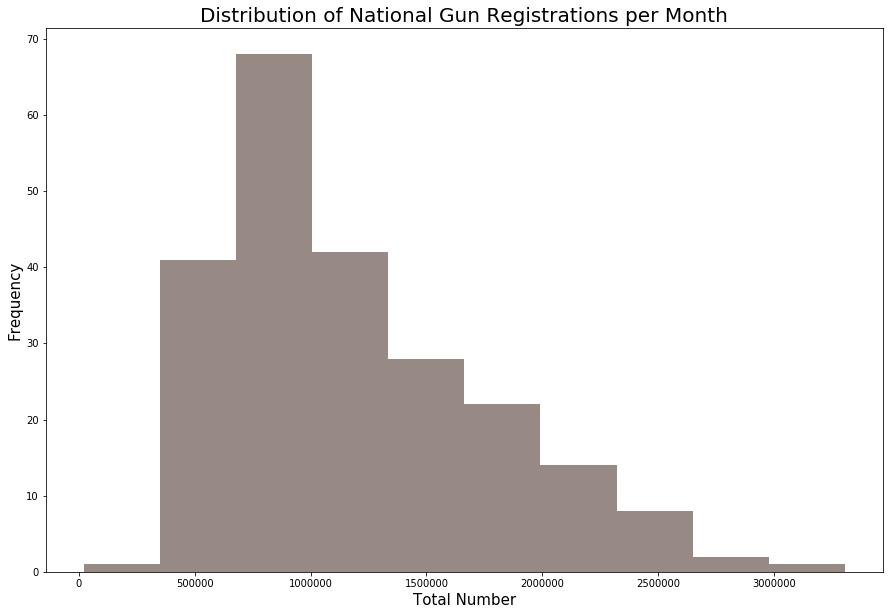

In [35]:
# plot histogram 
fig, ax = plt.subplots(figsize = (15, 10))
plt.hist(nics_summed['totals'])
plt.title("Distribution of National Gun Registrations per Month", fontsize = 20) 
plt.xlabel("Total Number", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show();

The histogram is right-skewed, which means that the mean is typically greater than the median. Because my data is not symmetric, I should use the median rather than the mean if needed in my analysis. From the histogram, I can also see that there is a lot of variability present in my data, with values ranging from near zero to over 3,000,000! Given this large range, a box plot will be helpful in order to determine if outliers are present in the data.  

In [36]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

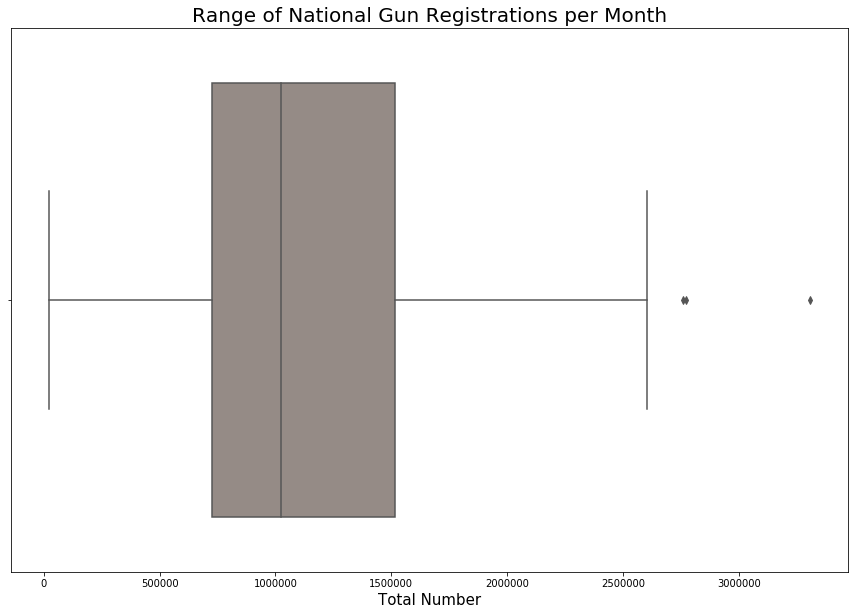

In [37]:
# plot box plot
fig, ax = plt.subplots(figsize = (15, 10))
g = sns.boxplot(x = nics_summed['totals'], ax = ax)
plt.title("Range of National Gun Registrations per Month", fontsize = 20) 
plt.xlabel("Total Number", fontsize=15)
plt.show(); 

As I suspected, it appears that there are a few outliers which fall outside the interquartile range. Given the size of my dataset and the nature of my analysis, I will not drop the outlier values.  

Now, I can examine how the number of monthly gun registrations has developed over time.

In [38]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

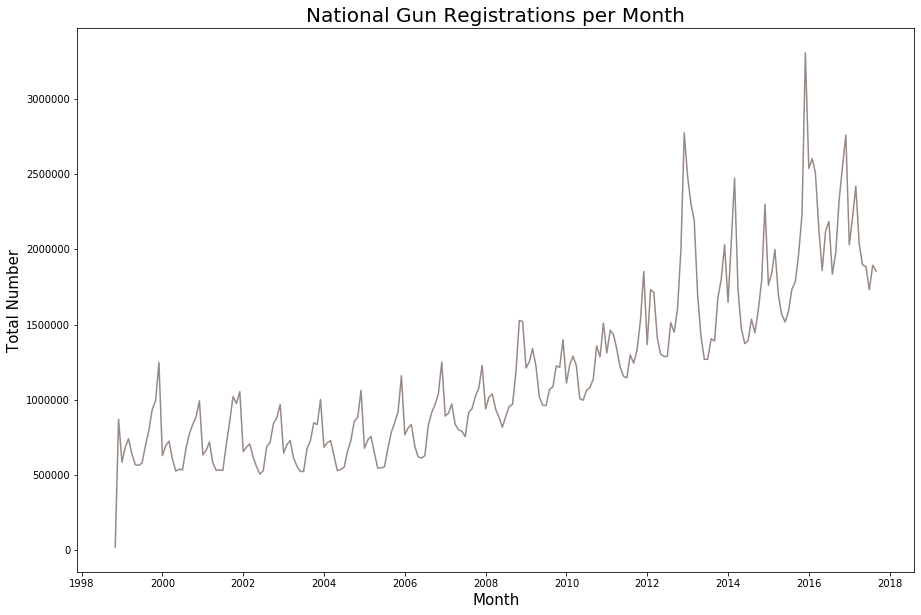

In [39]:
# plot line chart
fig, ax = plt.subplots(figsize = (15, 10))
g = sns.lineplot(data = nics_summed, ax = ax)
plt.title("National Gun Registrations per Month", fontsize = 20) 
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Number", fontsize=15)
ax.get_legend().set_visible(False)
plt.show(); 

Plotting the data over time shows me that national monthly gun registrations remained relatively constant until approximately 2007, when an upward trend began. Additionally, yearly seasonal fluctuations are present across the entire time range. 

In [40]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

### Research Question 2: Do Illinois and Indiana see higher or lower registrations compared to the national average? {-}

To answer this question, I will first find the median number of national background checks per month. I will use the median rather than the mean due to the right-skewed histogram. 

In [41]:
# group by month and find mean of registrations
nics_mean = nics_no_state.groupby('month').median().reset_index()

# add in "State" column 
nics_mean["state"] = "National"

# create list of desired values
states = ['Illinois', 'Indiana']

# filter dataset
nics_sm = nics[nics.state.isin(states)]

# reset index 
nics_sm.reset_index(drop=True, inplace=True)

# remove columns 
nics_sm = nics_sm[['month', 'state', 'totals']]

# convert "Month" datatype and format
nics_sm['month'] = pd.to_datetime(nics_sm['month'], format='%Y%m')

# append national data
nics_sm = nics_sm.append(nics_mean, ignore_index = True)

In [42]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

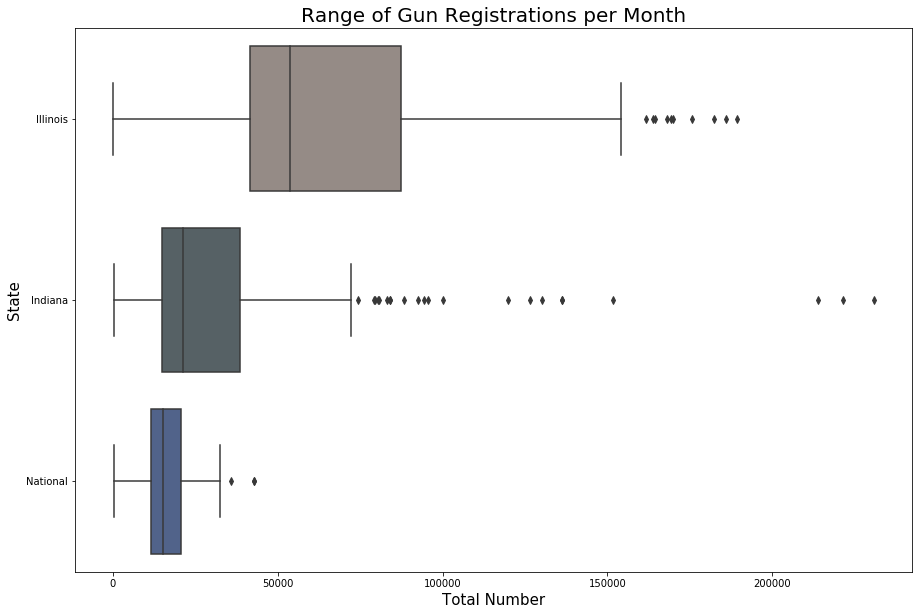

In [43]:
# plot box plot
fig, ax = plt.subplots(figsize = (15, 10))
g = sns.boxplot(x = 'totals', y = 'state', data = nics_sm, ax = ax)
plt.title("Range of Gun Registrations per Month", fontsize = 20)
plt.xlabel("Total Number", fontsize=15)
plt.ylabel("State", fontsize=15)
plt.show();

This box plot shows me that the number of gun registrations in both Indiana and Illinois are higher than the national median, with Illinois seeing greater variability than Indiana. Additionally, more outlier values are present in the data for both states, particularly Indiana. 

I can now use a line graph to explore how the number of monthly gun registrations in Illinois and Indiana has developed over time and compare these developments with the national trendline. 

In [44]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

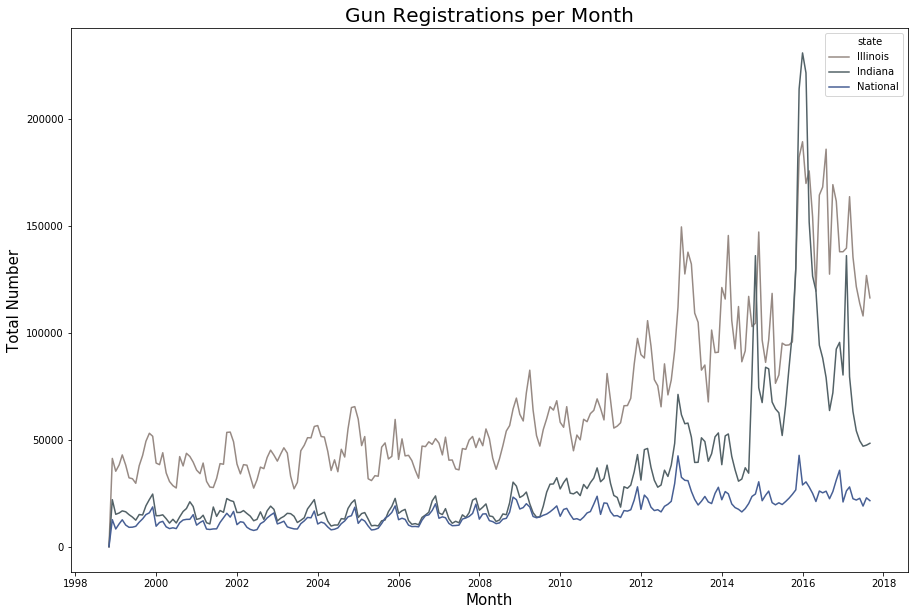

In [45]:
# plot line chart 
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x = "month", y="totals", hue="state", data = nics_sm, ax = ax)
plt.title("Gun Registrations per Month", fontsize = 20) 
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Number", fontsize=15)
plt.show(); 

In comparison to the previous line plot, I see similar seasonality and trendlines. Across all three categories - Illinois, Indiana, and National - monthly gun registrations remain constant until around 2008, when an upward trend began. 

Indiana's registrations were similar to the national median until 2009, when the number began to increase at a faster rater. In contrast, Illinois' registrations have consistently been higher than the national median. 

Both states saw significant peaks in registrations in 2013, 2014, and 2016, with Indiana seeing a far greater spike - nearly surpassing Illinois in 2014 and seeing over 50,000 more registrations than Illinois in 2016.  

I can also incorporate the census data to use a metric like "gun registrations per capita" to compare the two states on a more granular level. Unfortunately, the population data is only available for 2010 and 2016, so I will only be able to use this metric for those two years.

To create this metric, I will first filter the census dataset for only the first two population metrics, from April 2010 and July 2016. I will then pivot the dataframe so that it has the same shape as the nics dataframe. 

In [46]:
# filter dataframe
census_pop = census.iloc[:2, :]

# reshape dataframe 
census_pop = census_pop.melt(id_vars = ['Year'], var_name = 'State', value_name = 'Population').iloc[2:102, :]

Now that the data is reshaped, I will return to the nics dataframe and calculate the total number of gun registrations per state for the 12 months prior to each population metric. The "2010" total will sum the number of gun registrations from April 2009 - April 2010 and the "2016" total will reflect July 2015 - July 2016 registrations. To do this, I will remove all unnecessary rows, create a new column labeled with either "2010" or "2016", and then group by year and state in order to sum registrations.  

In [47]:
# create boolean masks
mask_2010 = (nics['month'] >= '2009-04-01') & (nics['month'] <= '2010-04-01')
mask_2016 = (nics['month'] >= '2015-07-01') & (nics['month'] <= '2016-07-01')

# filter dataset 
nics_2010 = nics[mask_2010]
nics_2010['Year'] = '2010'
nics_2016 = nics[mask_2016]
nics_2016['Year'] = '2016'

# append dataframes 
nics_capita = nics_2010.append(nics_2016, ignore_index = True)

# drop "Month" column 
nics_capita = nics_capita.drop(columns='month')

# group by year, state and sum registrations 
nics_capita_final = nics_capita.groupby(['Year', 'state'])['totals'].sum().reset_index()

Now that both my datasets are prepared, I can merge and calculate the "registrations per capita" metric per state. 

However, when I first attempted to merge the two dataframes, I discovered the "Year" column in the census dataframe contained a leading space. I will have to remove this before merging. 

In [48]:
# check whitespace 
census_pop['Year'].str.isspace().any()

False

As the code line above shows, the space was not saved as a whitespace, so str.strip() did not remove it. I will use str.replace() instead. 

In [49]:
# remove leading white space 
census_pop['Year'] = census_pop['Year'].str.replace(" ", "")

In [50]:
# merge dataframes 
capita_final = pd.merge(census_pop, nics_capita_final, how = 'inner', left_on = ['Year', 'State'], 
                        right_on = ['Year', 'state'])

Now that my dataframes are correctly merged, I can calculate the gun registrations per capita metric. 

In [51]:
capita_final['per_capita'] = capita_final['totals'] / capita_final['Population']

I will once again check the datatypes and change columns as needed. 

In [52]:
# check datatypes
capita_final.dtypes

Year          object
State         object
Population    object
state         object
totals         int64
per_capita    object
dtype: object

In [53]:
# convert datatypes 
capita_final['Population'] = capita_final['Population'].astype(float)
capita_final['per_capita'] = capita_final['per_capita'].astype(float)

In [54]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

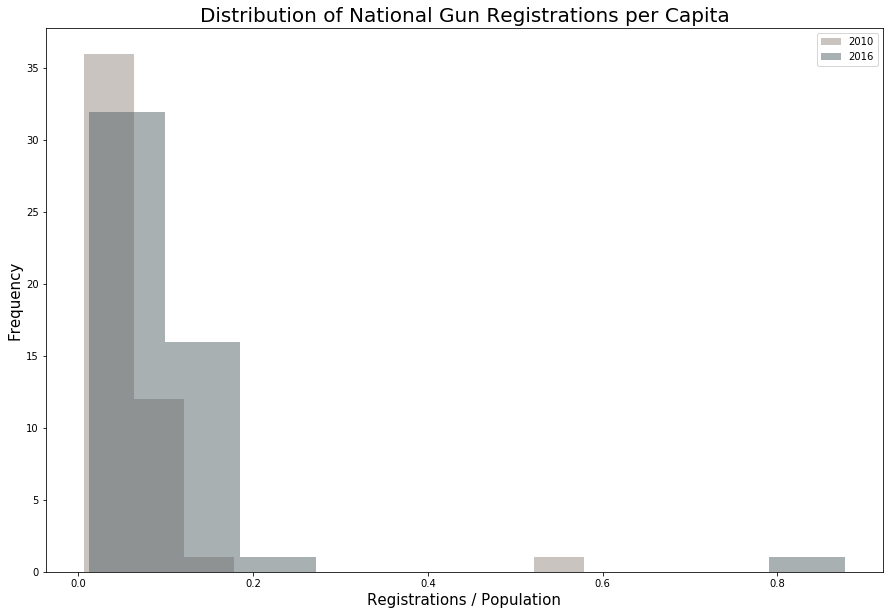

In [55]:
# plot histogram 
x = capita_final.loc[capita_final['Year'] == '2010']
y = capita_final.loc[capita_final['Year'] == '2016']
fig, ax = plt.subplots(figsize = (15, 10))
plt.hist(x = x['per_capita'], alpha = 0.5, label = '2010')
plt.hist(x = y['per_capita'], alpha = 0.5, label = '2016')
plt.title("Distribution of National Gun Registrations per Capita", fontsize = 20) 
plt.xlabel("Registrations / Population", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend(loc='upper right')
plt.show();

This histogram is also right-skewed, so I will also use the median rather than the mean in further analysis. Although there is not too much variability in the data, it is clear that an outlier is present for both years. 

In [56]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

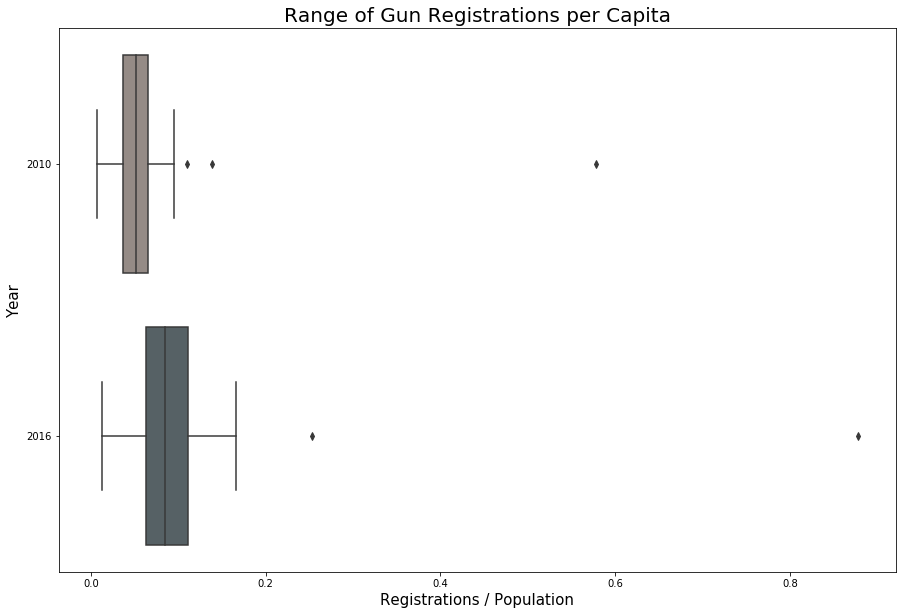

In [57]:
# plot box plot
fig, ax = plt.subplots(figsize = (15, 10))
g = sns.boxplot(x = 'per_capita', y = 'Year', data = capita_final, ax = ax, orient = "h")
plt.title("Range of Gun Registrations per Capita", fontsize = 20)
plt.xlabel("Registrations / Population", fontsize=15)
plt.ylabel("Year", fontsize=15)
plt.show();

This box plot confirms what I saw in the histogram, that there are two clear outliers in my data. Because I am now only examining one data point per state in both 2010 and 2016, I will drop these outlier values. In order to continue my analysis, I will need to reshape my dataset. 

In [58]:
# remove outliers 
capita_final = capita_final.loc[capita_final['per_capita'] < 0.4]

# remove columns 
capita_no_state = capita_final[['Year', 'per_capita']]

# group by Year and find mean of registrations per capita
capita_mean = capita_no_state.groupby('Year').median().reset_index()

# add in "State" column 
capita_mean["state"] = "National"

# filter dataset
capita_sm = capita_final[capita_final.State.isin(states)]

# reset index 
capita_sm.reset_index(drop=True, inplace=True)

# remove columns 
capita_sm = capita_sm[['Year', 'state', 'per_capita']]

# append national data
capita_sm = capita_sm.append(capita_mean, ignore_index = True)

In [59]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

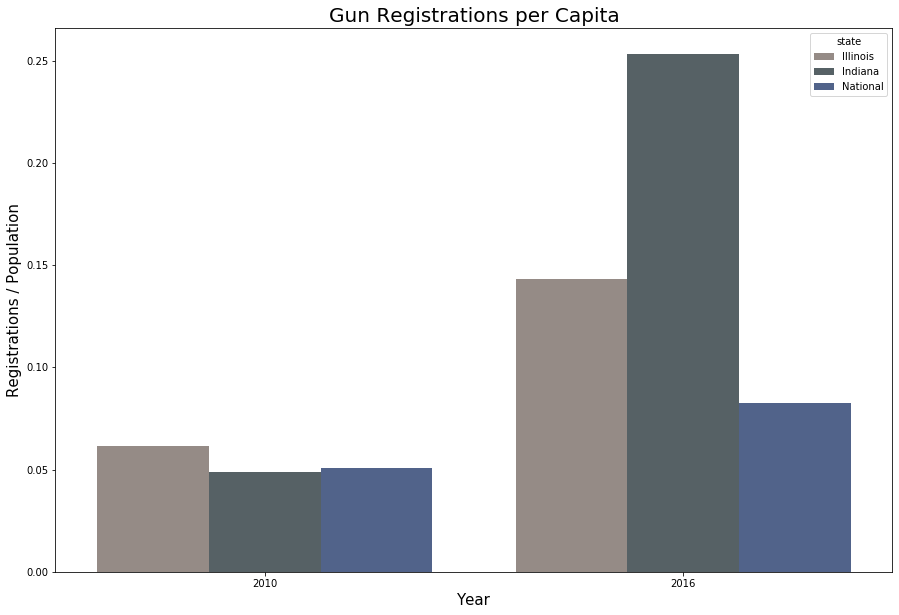

In [60]:
# plot line chart 
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = "Year", y="per_capita", hue="state", data = capita_sm, ax = ax)
plt.title("Gun Registrations per Capita", fontsize = 20) 
plt.xlabel("Year", fontsize=15)
plt.ylabel("Registrations / Population", fontsize=15)
plt.show(); 

Because I am now only comparing two years, 2010 and 2016, instead of across many years, a grouped bar chart better visualizes the data. 

The metric "registrations per capita" further substantiates the overall upward trendline seen in the line graph above - for Illinois, Indiana, and the nation as a whole. This metric also provides me with new insight into the data. For example, the line graph above showed that both Illinois and Indiana had more gun registrations that the national median in 2010. However, Indiana had less registrations per capita than the nation as a whole in this year. 

In [61]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

### Research Question 3:  What socio-economic characteristics are associated with higher gun registrations? {-} 

For my final research question, I will create a smaller version of the census dataframe with only the relevant socio-economic information: education, property values and income level. Similar to the registration per capita metric above, the dataset only provides the 2011-2015 median for these variables. In order to compare the data, I will have to filter, reshape and aggregate the gun registration data accordingly. 

In [62]:
# select data to keep 
census_se_keep = ['Median value of owner-occupied housing units','Median gross rent', 
                    'High school graduate or higher', "Bachelor's degree or higher", 
                    'Median household income','Per capita income in past 12 months', 'Persons in poverty']

# filter dataset 
census_se = census.loc[census['Fact'].isin(census_se_keep)]

# reshape dataframe 
census_se = census_se.melt(id_vars = ['Fact'], var_name = 'State', value_name = 'Value').iloc[0:350, :]
census_se = census_se.pivot(index = 'State', columns = 'Fact')['Value'].reset_index()

# create boolean masks
mask_11_15 = (nics['month'] >= '2011-01-01') & (nics['month'] <= '2015-12-01')

# filter dataset 
nics_11_15 = nics[mask_11_15]

# group by year, state and sum registrations 
nics_11_15_final = nics_11_15.groupby(['state'])['totals'].median().reset_index()

# rename column 
nics_11_15_final.rename(columns = {'totals': 'Reg_Median'}, inplace = True)

# merge datasets 
se_final = pd.merge(census_se, nics_11_15_final, how = 'inner', left_on = 'State', right_on = 'state')

In [63]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

Now that my dataset is ready, I can compare all variables pertaining to education ("High school graduate or higher", "Bachelor's degree or higher"), property value ("Median value of owner-occupied housing units", "Median gross rent") and income ("Median household income", "Persons in poverty") with the median number of gun registrations per state. I will use seaborn's "regplot", which plots the data and then fits a linear regression model. I will keep the default parameters - a 95% confidence interval and 1,000 bootstrap resamples. 

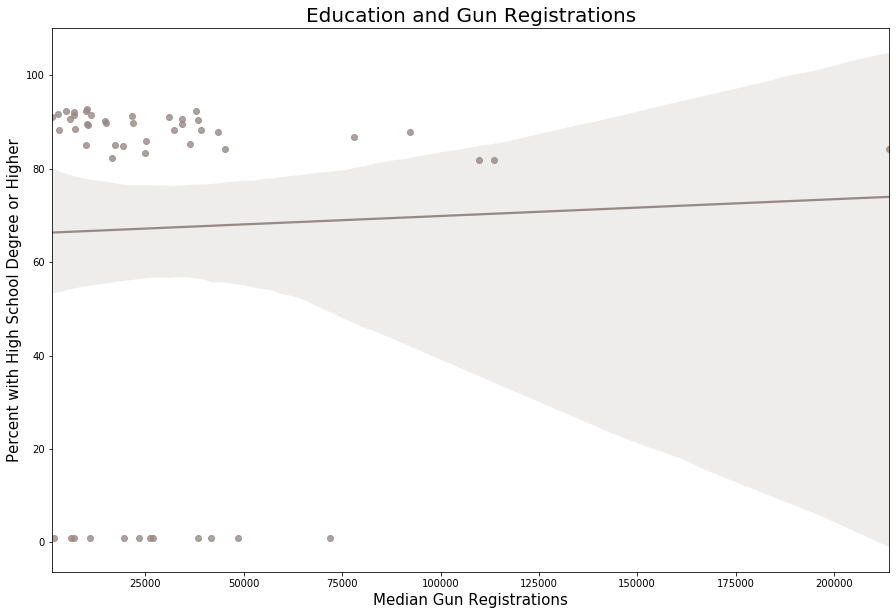

In [64]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.regplot(x = "Reg_Median", y = "High school graduate or higher", data = se_final, ax = ax)
plt.title("Education and Gun Registrations", fontsize = 20) 
plt.xlabel("Median Gun Registrations", fontsize = 15)
plt.ylabel("Percent with High School Degree or Higher", fontsize = 15)
plt.show();

In [65]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

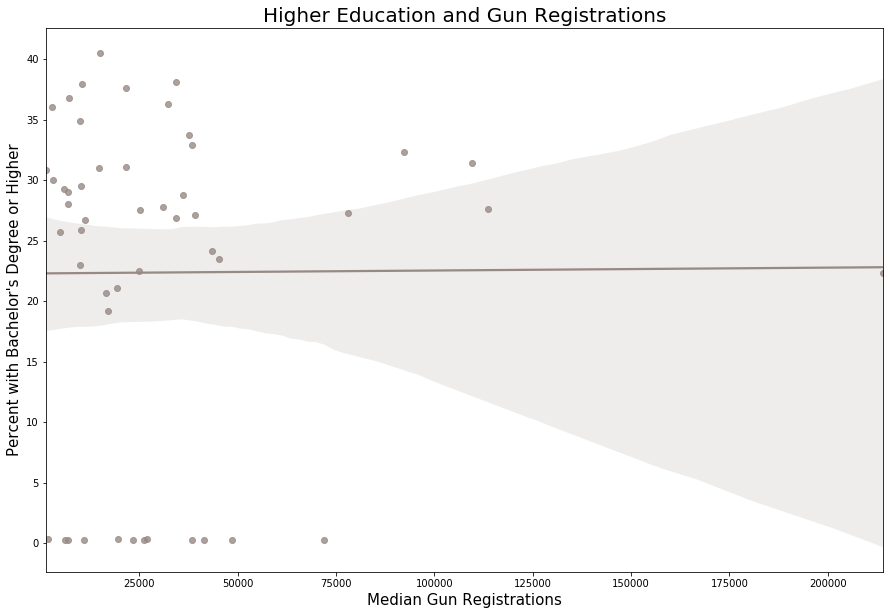

In [66]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.regplot(x = "Reg_Median", y = "Bachelor's degree or higher", data = se_final, ax = ax)
plt.title("Higher Education and Gun Registrations", fontsize = 20) 
plt.xlabel("Median Gun Registrations", fontsize = 15)
plt.ylabel("Percent with Bachelor's Degree or Higher", fontsize = 15)
plt.show();

In [67]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

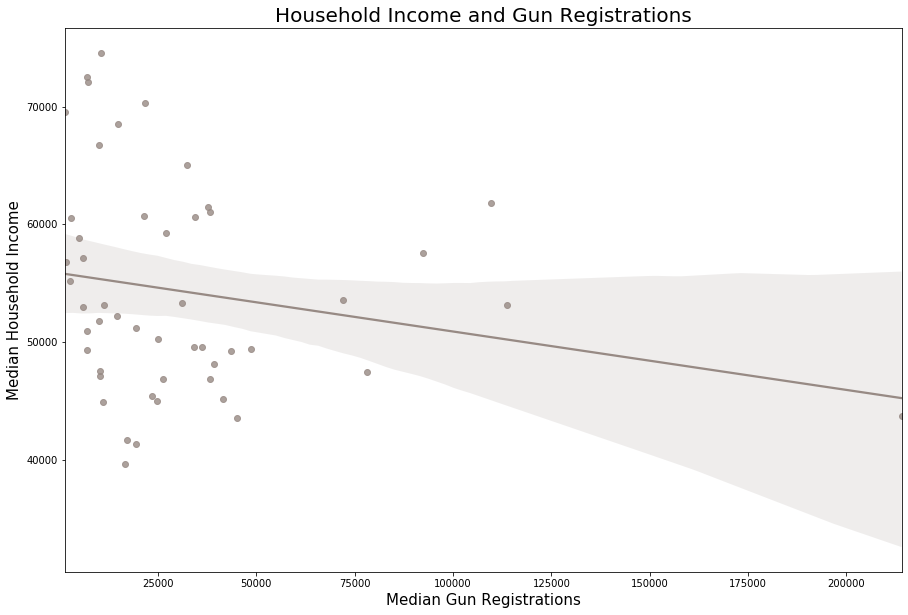

In [68]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.regplot(x = "Reg_Median", y = "Median household income", data = se_final, ax = ax)
plt.title("Household Income and Gun Registrations", fontsize = 20) 
plt.xlabel("Median Gun Registrations", fontsize = 15)
plt.ylabel("Median Household Income", fontsize = 15)
plt.show();

In [69]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

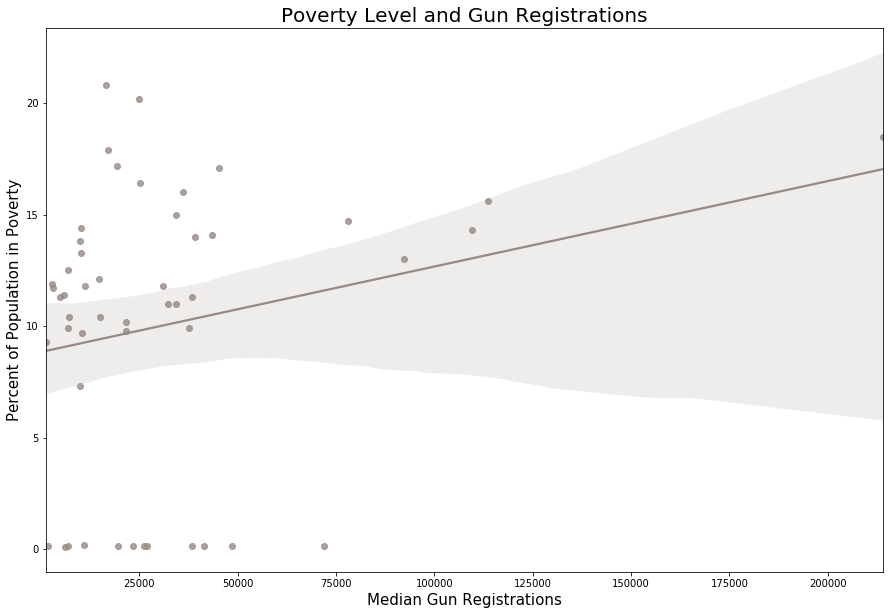

In [70]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.regplot(x = "Reg_Median", y = "Persons in poverty", data = se_final, ax = ax)
plt.title("Poverty Level and Gun Registrations", fontsize = 20) 
plt.xlabel("Median Gun Registrations", fontsize = 15)
plt.ylabel("Percent of Population in Poverty", fontsize = 15)
plt.show();

In [71]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

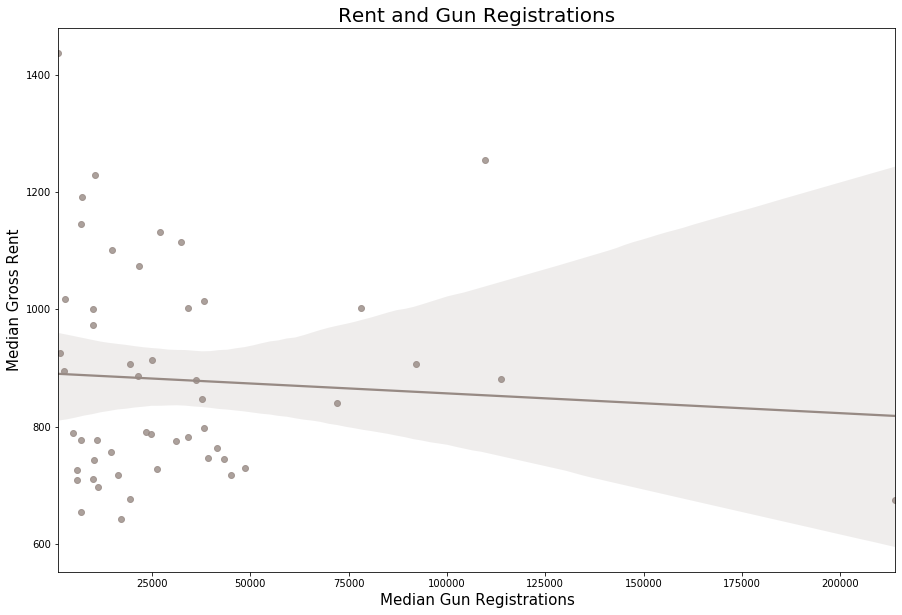

In [72]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.regplot(x = "Reg_Median", y = "Median gross rent", data = se_final, ax = ax)
plt.title("Rent and Gun Registrations", fontsize = 20) 
plt.xlabel("Median Gun Registrations", fontsize = 15)
plt.ylabel("Median Gross Rent", fontsize = 15)
plt.show();

In [73]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

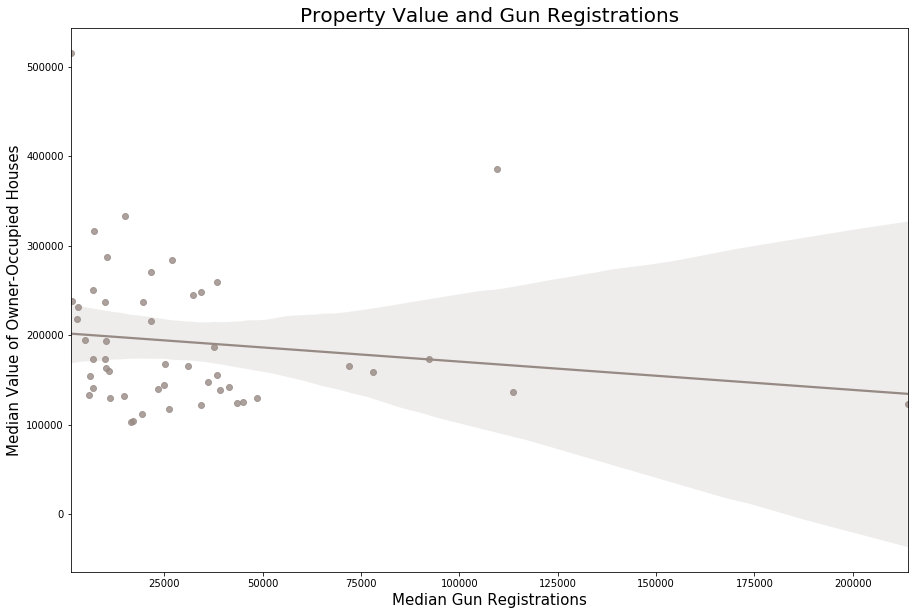

In [74]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.regplot(x = "Reg_Median", y = "Median value of owner-occupied housing units", data = se_final, ax = ax)
plt.title("Property Value and Gun Registrations", fontsize = 20) 
plt.xlabel("Median Gun Registrations", fontsize = 15)
plt.ylabel("Median Value of Owner-Occupied Houses", fontsize = 15)
plt.show();

In [75]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

After examining the plots, it appears that a positive relationship could exist between gun registrations and percent of persons in poverty, as well as a negative relationship between gun registrations and median gross rent and median value of owner-occupied houses. I can use panda's .corr() method to find the correlation between these variables, using a Pearson's correlation coefficient. Before running the correlation, I will remove the gun registrations outlier seen in the plots, as Pearson's coefficient is very sensitive to outliers. I will also change the dataframe datatypes to float. 

In [76]:
# remove outlier 
se_final = se_final.loc[se_final['Reg_Median'] < 200000]

# change datatypes 
for c in se_final.columns: 
    if c == 'State': 
        pass
    elif c == 'state': 
        pass
    else: 
        se_final[c] = se_final[c].astype(float)

# determine correlation 
correlation = se_final.corr(method='pearson', min_periods=1)

# filter dataset 
correlation = correlation['Reg_Median']

# view results
correlation 

Bachelor's degree or higher                     0.010054
High school graduate or higher                 -0.014593
Median gross rent                               0.067503
Median household income                        -0.121234
Median value of owner-occupied housing units   -0.083689
Per capita income in past 12 months            -0.092919
Persons in poverty                              0.127938
Reg_Median                                      1.000000
Name: Reg_Median, dtype: float64

The Pearson's coefficient values tell me that while linear relationships between gun registrations and all socio-economic variables exist, they are very weak. If there was a stronger correlation with a particular characteristic, it would be interesting to conduct further analysis with a particular focus on Illinois and Indiana. 

In [77]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

## Conclusions {-} 

+ **Main Findings**
    + Overall, national monthly gun registrations remained relatively constant until 2007, when an upward trend began. 
    + Illinois consistently saw higher registration numbers than the national median. In contrast, total number of registrations within Indiana matched the national median until 2009. Both states still experienced trendlines that were similar to the national level. 
    + Although Illinois' total registration numbers were higher than Indiana from 1998 - 2018, Indiana saw a higher number of registrations per capita in 2016. 
    + Although correlations exist between socio-economic characteristics (education, property value and income level) and gun registrations for the years 2011 - 2015, they are very weak. If more census data for a longer period of time was available, it may be worth revisiting this analysis - particularly for variables pertaining to income and poverty levels.  

+ **Limitations** 
    + A lack of census data prevented more detailed analyses, particularly when exploring the registrations per capita metric and possible relationships between socio-economic variables and gun registrations. 

## Author: Theresa Gasinski {-} 